# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

corr of YEARS_BIRTH vs. TARGET: -0.07823930831003233
statistics of YEARS_BIRTH:
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64



Text(0.5, 1.0, 'Failure to Repay by Age Group')

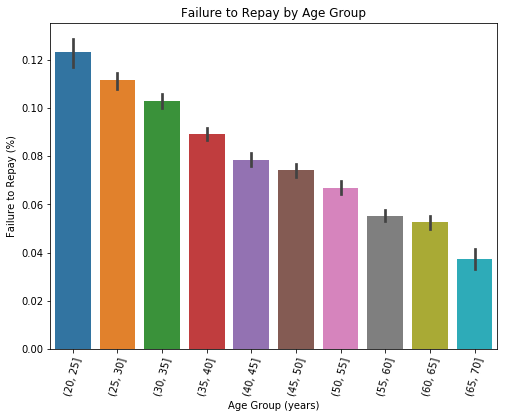

In [5]:
# retrieve BIRTH data
age_data = app_train.loc[:, ['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
print(f"corr of YEARS_BIRTH vs. TARGET: {age_data.corr()['TARGET']['YEARS_BIRTH']}")
print(f"statistics of YEARS_BIRTH:\n{age_data['YEARS_BIRTH'].describe()}\n")

# categorize YEARS_BIRTH into 10 groups
age_cut = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_data['AGES_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = age_cut)

# draw a bar chart of selected feature vs. TARGET
age_group_sorted = pd.unique(age_data['AGES_BINNED'].sort_values())
      
plt.figure(figsize=(8,6))

px = age_data['AGES_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75); 
plt.xlabel('Age Group (years)') 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')


statistics of AMT_INCOME_TOTAL:
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

corr of AMT_INCOME_TOTAL vs. TARGET: -0.003981865601221981
statistics of LOG_INCOME_TOTAL:
count    307511.000000
mean          5.172116
std           0.212331
min           4.409087
25%           5.051153
50%           5.167760
75%           5.306425
max           8.068186
Name: LOG_INCOME_TOTAL, dtype: float64

corr of LOG_INCOME_TOTAL vs. TARGET: -0.018482273672501964


Text(0.5, 1.0, 'Failure to Repay by Amt Income Group')

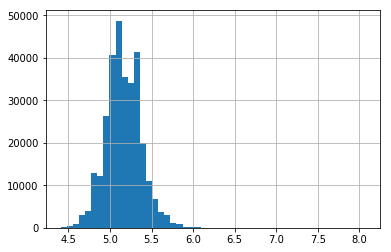

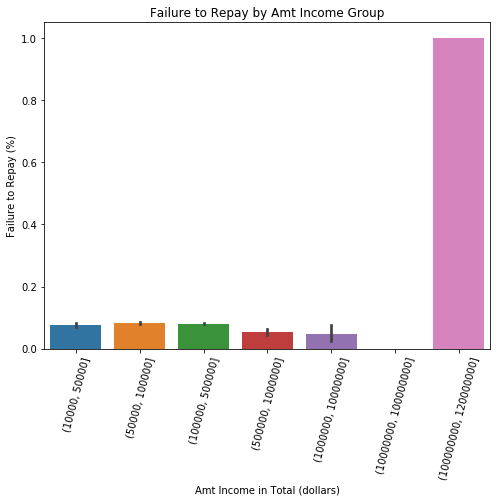

In [6]:
# retrieve AMT_INCOME_TOTAL
income_data = app_train.loc[:, ['TARGET', 'AMT_INCOME_TOTAL']] # subset
print(f"statistics of AMT_INCOME_TOTAL:\n{income_data['AMT_INCOME_TOTAL'].describe()}\n")
print(f"corr of AMT_INCOME_TOTAL vs. TARGET: {income_data.corr()['TARGET']['AMT_INCOME_TOTAL']}")

# plot histogram
# income_data['AMT_INCOME_TOTAL'].hist(bins = 50)
income_data['LOG_INCOME_TOTAL'] = np.log10(income_data['AMT_INCOME_TOTAL'])
print(f"statistics of LOG_INCOME_TOTAL:\n{income_data['LOG_INCOME_TOTAL'].describe()}\n")
print(f"corr of LOG_INCOME_TOTAL vs. TARGET: {income_data.corr()['TARGET']['LOG_INCOME_TOTAL']}")
income_data['LOG_INCOME_TOTAL'].hist(bins = 50)

# categorize AMT_INCOME_TOTAL into 7 groups
income_cut = [10000, 50000, 100000, 500000, 1000000, 10000000, 100000000, 120000000]
income_data['AMT_INCOME_BINNED'] = pd.cut(income_data['AMT_INCOME_TOTAL'], bins = income_cut)

# draw a bar chart of selected feature vs. TARGET
income_group_sorted = pd.unique(income_data['AMT_INCOME_BINNED'].sort_values())
      
plt.figure(figsize=(8,6))

px = income_data['AMT_INCOME_BINNED']
py = income_data['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75); 
plt.xlabel('Amt Income in Total (dollars)') 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Amt Income Group')


<font color=#0099ff style = italic>
    **This might be a single case taht the richest client who is difficult to repay the loan.**
</font>

statistics of AMT_GOOD_PRICE:
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

corr of AMT_GOODS_PRICE vs. TARGET: -0.039645281169414404
statistics of LOG_GOODS_PRICE:
count    307233.000000
mean          5.628667
std           0.310747
min           4.607455
25%           5.377488
50%           5.653213
75%           5.832189
max           6.607455
Name: LOG_GOODS_PRICE, dtype: float64

corr of LOG_GOODS_PRICE vs. TARGET: -0.022423772520283027


Text(0.5, 1.0, 'Failure to Repay by Log of Amt Goods Price Group')

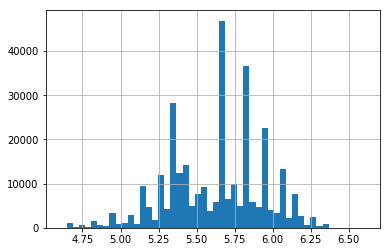

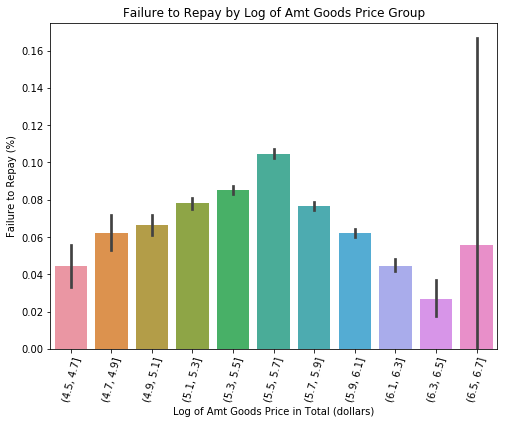

In [7]:
# retrieve AMT_GOODS_PRICE
price_data = app_train.loc[:, ['TARGET', 'AMT_GOODS_PRICE']] # subset
print(f"statistics of AMT_GOOD_PRICE:\n{price_data['AMT_GOODS_PRICE'].describe()}\n")
print(f"corr of AMT_GOODS_PRICE vs. TARGET: {price_data.corr()['TARGET']['AMT_GOODS_PRICE']}")

# plot histogram
#price_data['AMT_GOODS_PRICE'].hist(bins = 50)
price_data['LOG_GOODS_PRICE'] = np.log10(price_data['AMT_GOODS_PRICE'])   # base 10 log of GOODS_PRICE
print(f"statistics of LOG_GOODS_PRICE:\n{price_data['LOG_GOODS_PRICE'].describe()}\n")
print(f"corr of LOG_GOODS_PRICE vs. TARGET: {price_data.corr()['TARGET']['LOG_GOODS_PRICE']}")
price_data['LOG_GOODS_PRICE'].hist(bins = 50)

# categorize AMT_GOODS_PRICE into 11 groups
price_cut = [4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7]
price_data['LOG_PRICE_BINNED'] = pd.cut(price_data['LOG_GOODS_PRICE'], bins = price_cut)

# draw a bar chart of selected feature vs. TARGET
price_group_sorted = pd.unique(price_data['LOG_PRICE_BINNED'].sort_values())
      
plt.figure(figsize=(8,6))

px = price_data['LOG_PRICE_BINNED']
py = price_data['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75); 
plt.xlabel('Log of Amt Goods Price in Total (dollars)') 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Log of Amt Goods Price Group')
